#### Initialization

In [13]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

#### Data loading 

In [42]:
data = pd.read_csv('.\Dataset.csv')

In [43]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [44]:
data.dropna(inplace=True)

#### Test train split 

In [45]:
X = data.drop(columns=['MPG'], inplace=False).values
y = data['MPG'].values
np.random.seed(100)
X, y = shuffle(X, y)
train_size = 200
Xtrain = X[0:train_size,]
Xtest =  X[train_size+1:,]
ytrain = y[0:train_size,]
ytest = y[train_size+1:,]
Ntr = len(ytrain)
Nte = len(ytest)

#### Normalization

In [46]:
scaler_X = StandardScaler().fit(Xtrain)
scaler_y = StandardScaler().fit(ytrain.reshape(-1, 1))
Xtrain, Xtest = scaler_X.transform(Xtrain), scaler_X.transform(Xtest)
ytrain, ytest = scaler_y.transform(ytrain.reshape(-1, 1)), scaler_y.transform(ytest.reshape(-1, 1))

#### Linear kernel

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


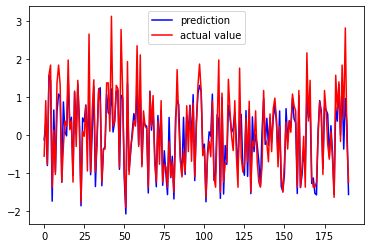

In [47]:
linear_model = SVR(kernel = 'linear')
linear_model.fit(Xtrain, ytrain)
y_pre_te = linear_model.predict(Xtest)
plt.plot(y_pre_te, 'b')
plt.plot(ytest, 'r')
plt.legend(['prediction', 'actual value'])

#### Polynomial kernel  

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


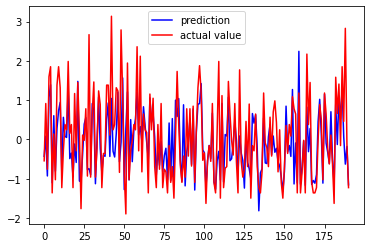

In [50]:
poly_model = SVR(kernel = 'poly', C = 5,  degree = 2)
poly_model.fit(Xtrain, ytrain)
y_pre_te = poly_model.predict(Xtest)
plt.plot(y_pre_te, 'b')
plt.plot(ytest, 'r')
plt.legend(['prediction', 'actual value'])

#### RBF kernel

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


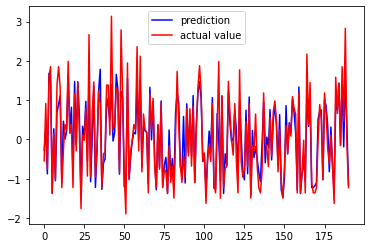

In [51]:
rbf_model = SVR(kernel = 'rbf')
rbf_model.fit(Xtrain, ytrain)
y_pre_te = rbf_model.predict(Xtest)
plt.plot(y_pre_te, 'b')
plt.plot(ytest, 'r')
plt.legend(['prediction', 'actual value'])